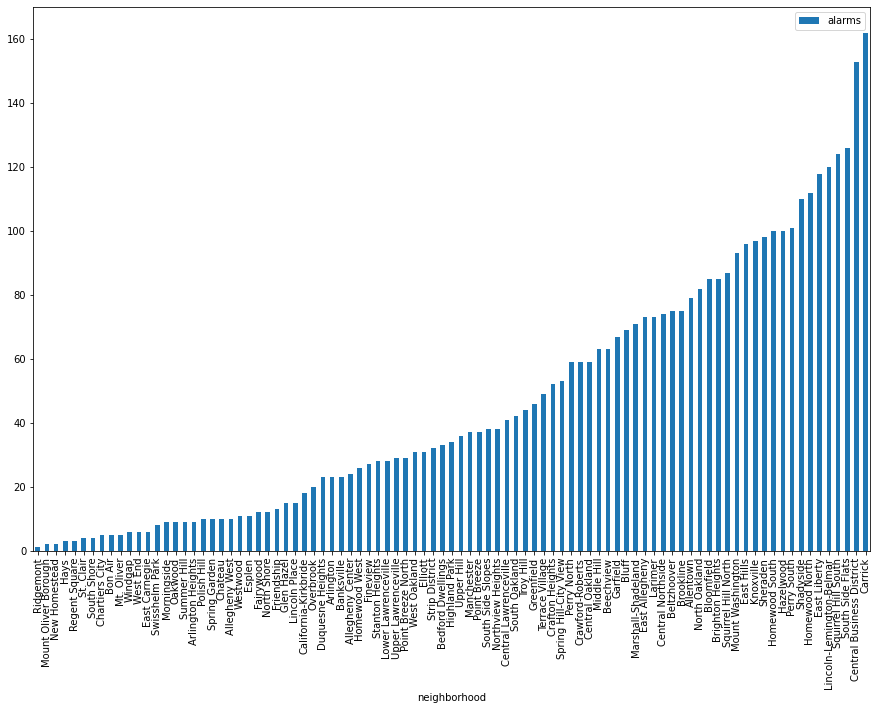

In [1]:
import pandas as pd
%matplotlib inline

fireData = pd.read_csv("fire.csv")

df = fireData[['neighborhood', 'alarms']].groupby(by='neighborhood').sum().sort_values(by ='alarms')

df.plot(kind = 'bar', figsize=(15,10))

In [2]:
import pandas as pd
import geopandas
%matplotlib inline

In [3]:
# import dataset
fireData1 = pd.read_csv("fire.csv")
# filter to important info
alarms = fireData1.groupby("neighborhood").sum()['alarms']
alarms.sort_values(ascending=False)

neighborhood
Carrick                      162
Central Business District    153
South Side Flats             126
Squirrel Hill South          124
Lincoln-Lemington-Belmar     120
                            ... 
Regent Square                  3
Hays                           3
New Homestead                  2
Mount Oliver Borough           2
Ridgemont                      1
Name: alarms, Length: 91, dtype: int64

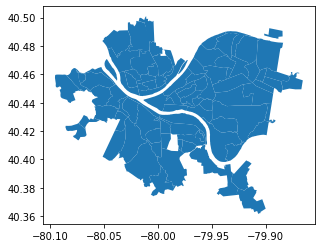

In [4]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [5]:
alarms_map = neighborhoods.merge(alarms, how='left', left_on='hood', right_on='neighborhood')
alarms_map[['hood','alarms','geometry']].head()

,hood,alarms,geometry
0,Central Oakland,59,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,82,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,31,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,59,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,32,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


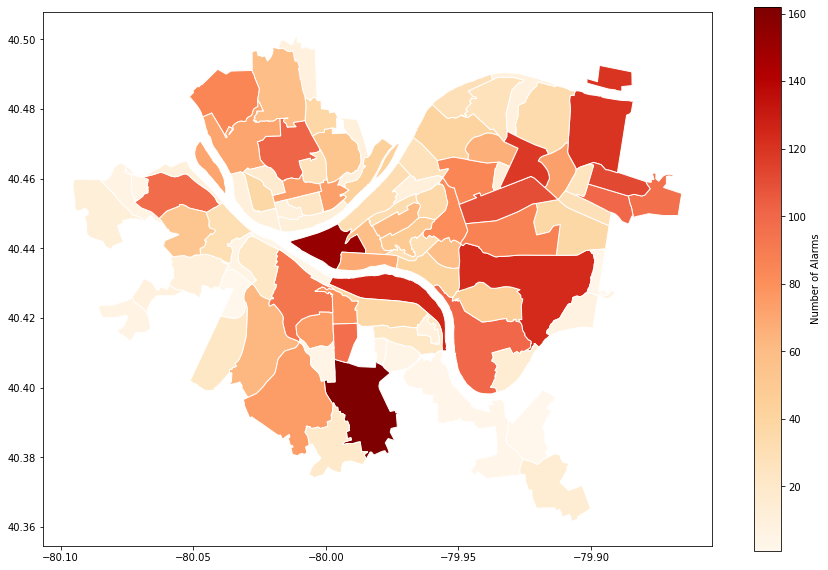

In [82]:
alarms_map.plot(column='alarms', figsize=(15,10), cmap='OrRd',edgecolor="white",legend=True,
               legend_kwds={'label': "Number of Alarms"})